In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm


class CNN_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.layer2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.layer3 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        
        self.fc_layer1 = nn.Linear(3*3*64, 300)
        self.fc_layer2 = nn.Linear(300, 150)
        self.fc_layer3 = nn.Linear(150, 10)
    
    def forward(self,x):
        #conv layer 1
        x = self.layer1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        #conv layer2
        x = self.layer2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        #conv layer 3
        x = self.layer3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        #fc layer 1
        x = x.view(-1,3*3*64)
        x = self.fc_layer1(x)
        x = F.relu(x)
        
        #fc layer 2
        x = self.fc_layer2(x)
        x = F.relu(x)
        
        #fc layer 3
        x = self.fc_layer3(x)
        
        return x
    

train_data = datasets.MNIST(root="./dataset", train=True, transform=transforms.ToTensor(), download=True)
test_data = datasets.MNIST(root="./dataset", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True)

model = CNN_Model()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Model .......

for epochs in range(3):
    for images, labels in tqdm(train_loader):
        optimizer.zero_grad()
        x = images 
        y = model(x)
        loss = criterion(y, labels)
        loss.backward()
        optimizer.step()

#Testing Model..............
        
correct = 0
total = len(test_data)

with torch.no_grad(): 
    for images, labels in tqdm(test_loader):
        x = images  
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print(f"Accuracy= {(correct/total)*100}%")

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy= 98.7699966430664%


In [2]:
# 2 cells below this cell are for checking visually how our model performs
# add index to load image and label in MNIST test_data
# you will get the image and true label corresponding to the image
# after running the next cell you will get the label predicted by our model

true lable: 9


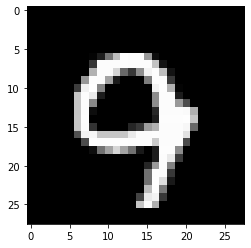

In [3]:
import matplotlib.pyplot as plt

im,lb = test_data[5800]
im = im.reshape([28,28])
plt.imshow(im, cmap='gray')
print("true lable: {}".format(lb))

In [4]:
x = im.view(1,1,28,28)
y = model(x)
prediction = torch.argmax(y,dim=1)
print("predicted label: {}".format(prediction))

predicted label: tensor([9])
